In [ ]:
#READING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [13]:
#READING DATASET

df = pd.read_csv('house.csv', encoding='utf-8')
print(df.info())

#how many rows and features 
rows, features=df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
#PREPROCESSING

 #drop unnecessary columns
df = df.drop(columns=['id', 'date', 'lat', 'long'])

# replace different types of missing values with NaN
df.replace(
    to_replace=["", " ", "NA", "null", "None", "N/A", "missing"],
    value=np.nan,
    inplace=True
)

# drop rows where target is null
target_col = 'price'
df = df[df[target_col].notna()]

# make separate dataframes for features and target variable
df_features = df.drop(columns=[target_col])
df_target = df[target_col]

# splitting the columns of features dataset into numerical and categorical features
numerical_features = df_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_features.select_dtypes(include=['object', 'category']).columns.tolist()


In [15]:
# SPLITING THE DATASET

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)


In [16]:
# setting up imputers
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# handle missing values
if numerical_features:
    X_train[numerical_features] = numerical_imputer.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = numerical_imputer.transform(X_test[numerical_features])

if categorical_features:
    X_train[categorical_features] = categorical_imputer.fit_transform(X_train[categorical_features])
    X_test[categorical_features] = categorical_imputer.transform(X_test[categorical_features])

# encoding categorical features
if categorical_features and len(categorical_features) > 0:
    encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
    encoded_train_array = encoder.fit_transform(X_train[categorical_features])
    encoded_test_array = encoder.transform(X_test[categorical_features])

    encoded_train_df = pd.DataFrame(
        encoded_train_array,
        columns=encoder.get_feature_names_out(categorical_features),
        index=X_train.index
    )
    encoded_test_df = pd.DataFrame(
        encoded_test_array,
        columns=encoder.get_feature_names_out(categorical_features),
        index=X_test.index
    )
else:
    # If no categorical features, create empty DataFrames to concat without error
    encoded_train_df = pd.DataFrame(index=X_train.index)
    encoded_test_df = pd.DataFrame(index=X_test.index)
    
# scaling numerical features
if numerical_features:
    scaler = StandardScaler()
    scaled_train_array = scaler.fit_transform(X_train[numerical_features])
    scaled_test_array = scaler.transform(X_test[numerical_features])

    scaled_train_df = pd.DataFrame(scaled_train_array, columns=numerical_features, index=X_train.index)
    scaled_test_df = pd.DataFrame(scaled_test_array, columns=numerical_features, index=X_test.index)

# concatenate encoded + scaled features
X_train = pd.concat([scaled_train_df, encoded_train_df], axis=1)
X_test = pd.concat([scaled_test_df, encoded_test_df], axis=1)

In [17]:
#TRAINING THE MODEL


rmse_list= []

for k in range(1, 11):
    
    model=KNeighborsRegressor(n_neighbors=k,weights='distance',metric='manhattan')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

best_k = np.argmin(rmse_list) +1 
print(f"Best k value: {best_k}")


c:\Users\patha\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\patha\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\patha\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\patha\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039

Best k value: 10


In [18]:
#EVALUATING MODEL

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")    
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


MAE: 115511.7118815972
MSE: 39289626950.06262
RMSE: 198216.11173177275
R^2: 0.74010794147112


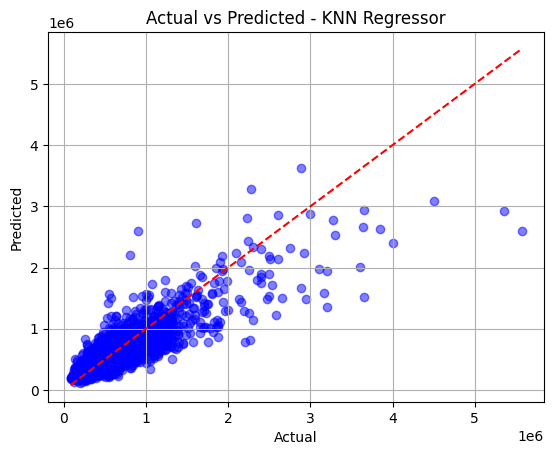

In [19]:
#DATA VISUALIZATION


plt.scatter(y_test, y_pred, c='blue',alpha=0.5)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - KNN Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()
